<span style = "font-size:24px;"> **Working with Major US Storm Data**

Conduct analysis about storm data in US in different time periods. The data is downloaded from the US goverment National Oceanic and Atmospheric Administration (NOAA) site, based on a data analysis study performed for the Geophysical Fluid Dynamics Laboratory (GFDL).

<span style = "font-size:20px;"> **US Hurricane Data: 1851-2019**

In [34]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('us-hurricane.csv')
print(df.dtypes)

Year                                            object
Month                                           object
States Affected and Category by States          object
Highest \nSaffir- \nSimpson \nU.S. Category    float64
Central Pressure \n(mb)                        float64
Max Wind \n(kt)                                 object
Name                                            object
dtype: object


 **Cleaning the data**

In [5]:
# Remove rows with 1850s, etc.
df = df[(df.Year.str.contains("s")) == False]

# Remove None value in Month
df = df[(df.Month.str.contains("None")) == False]

# Replace two multi-month rows
df = df.replace('Sp-Oc', 'Sep')
df = df.replace('Jl-Au', 'Jul')

# Standardize the column name
df.columns = ['Year', 'Month', 'States', 'Category',
'Pressure', 'Max Wind', 'Name']

df.Month = df.Month.str[:3] 

# Convert month-name to month
df.Month = pd.to_datetime(df.Month, format = '%b').dt.month

In [6]:
# Convert Year to int, Max Wind to float
df = df.astype({'Year': 'int'})

# Replace with nAn
df = df.replace('-----', np.NaN)

df = df.astype({'Max Wind': 'float'})

print(df.dtypes)

Year          int64
Month         int32
States       object
Category    float64
Pressure    float64
Max Wind    float64
Name         object
dtype: object


 **Presenting the data**

In [7]:
print(df['Category'].value_counts())

# category 1 and 2 hurricane are more popular

Category
1.0    123
2.0     84
3.0     63
4.0     29
5.0      4
Name: count, dtype: int64


array([[<Axes: title={'center': 'Year'}>]], dtype=object)

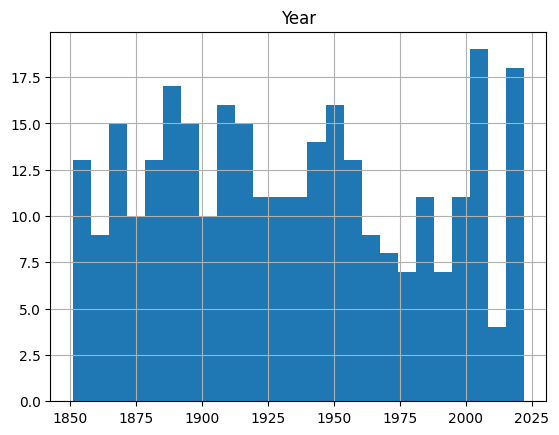

In [8]:
# Plot all hurricane event
df.hist(column='Year', bins=25)

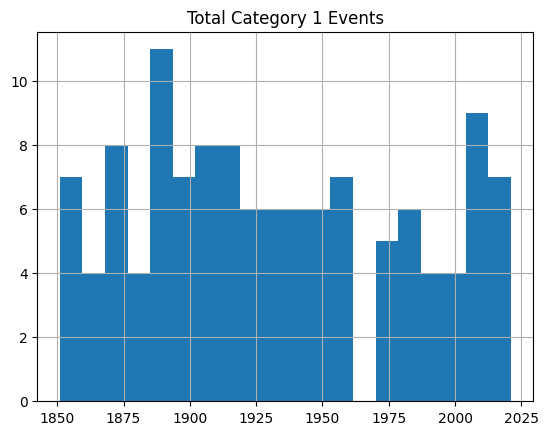

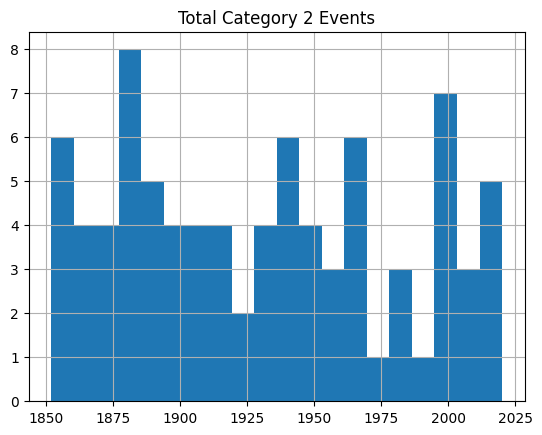

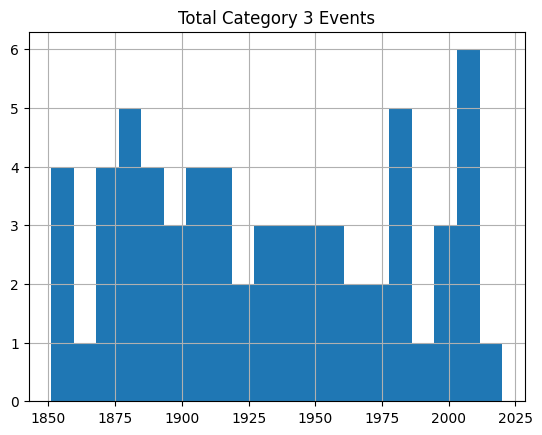

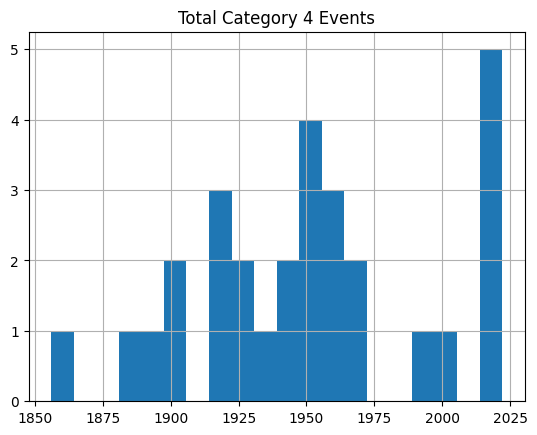

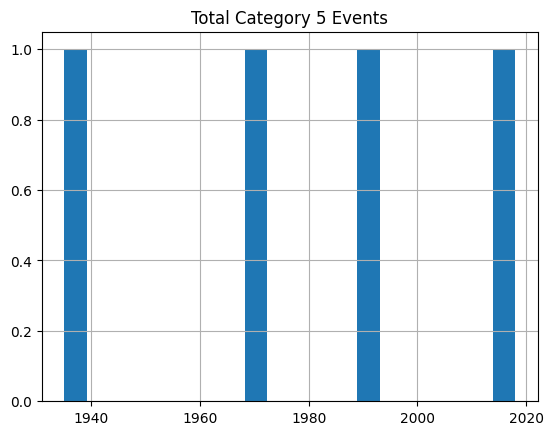

In [9]:
# Plot separate hurricane events
df_category = df[['Year', 'Category']]
df_wind = df[['Year', 'Max Wind']]
df_pressure = df[['Year', 'Pressure']]

for x in range(1,6):
    cat_num = x
    converted_num = str(cat_num)
    dfcat = df_category['Category'] ==(x)
    df1 = df_category[dfcat]
    df1.hist(column = 'Year', bins = 20)
    plt.title("Total Category " + (converted_num) + " Events")
    

<span style = "font-size:20px;"> **US Tropical Storm: 1851-1965, 1983-2019**

In [29]:
df1 = pd.read_csv('us-tropical-storm.csv')
df1 = df1[(df1.Date.str.contains('None')) == False]

**Cleaning the data**

In [30]:
# Clean the date column
special_characters = ['$', '*', '#', '%', '&']

for char in special_characters:
    df1['Date'] = df1['Date'].str.replace(char, '')


df1.columns = ['Storm#', 'Date', 'Time', 'Lat', 'Lon', 'MaxWinds', 'LandfallState', 'StormName']

print(df1.dtypes)
print(df1.head(10))


Storm#            object
Date              object
Time              object
Lat               object
Lon               object
MaxWinds         float64
LandfallState     object
StormName         object
dtype: object
   Storm#        Date   Time    Lat    Lon  MaxWinds LandfallState StormName
1       6  10/19/1851  1500Z  41.1N  71.7W      50.0           NY        NaN
6       3   8/19/1856  1100Z   34.8   76.4      50.0            NC       NaN
7       4   9/30/1857  1000Z   25.8     97      50.0            TX       NaN
8       3   9/14/1858  1500Z   27.6   82.7      60.0            FL       NaN
9       3   9/16/1858  0300Z   35.2   75.2      50.0            NC       NaN
10      7  10/17/1859  1600Z   26.4   80.1      60.0            FL       NaN
13      7  10/ 7/1861  1200Z   35.3   75.3      50.0            NC       NaN
14      8  11/ 1/1861  0800Z     26   81.8      60.0            FL       NaN
15      8  11/ 3/1861  0800Z     41   72.3      60.0            NY       NaN
16      8  11/ 3

In [31]:
df1.to_csv('test.csv')

In [36]:
# Convert value in Date column to a new format
df1['Date'] = pd.to_datetime(df1['Date'], format='mixed')

 **Presenting the data**

<Axes: >

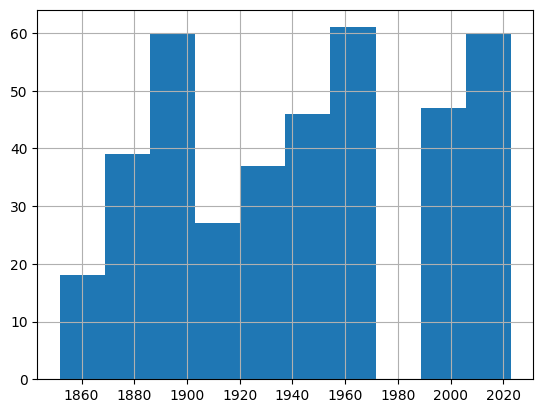

In [38]:
# Present tropical storm data
df2 = df1[['Date', 'MaxWinds']]
df2['Date'].hist()

In [39]:
# Present MaxWind value
print(df2.shape)
print(df2)

(395, 2)
          Date  MaxWinds
1   1851-10-19      50.0
6   1856-08-19      50.0
7   1857-09-30      50.0
8   1858-09-14      60.0
9   1858-09-16      50.0
..         ...       ...
426 2021-09-09      50.0
427 2022-07-01      35.0
428 2022-11-10      60.0
429 2022-11-10      40.0
430 2022-11-11      35.0

[395 rows x 2 columns]


<Axes: >

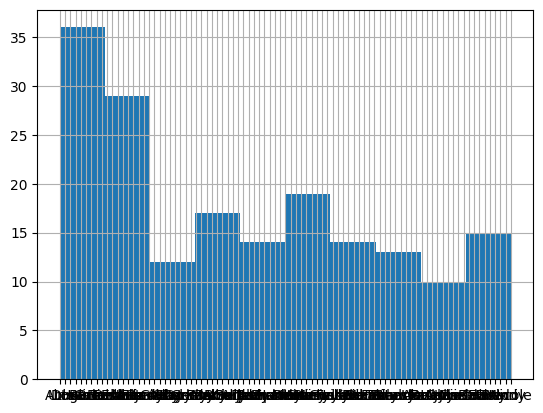

In [40]:
# Present Storm name
df1['StormName'].hist()

In [41]:
# Present a number of storms between knot events
df1_30 = df1[df1['MaxWinds'].between(30,39)]
df1_40 = df1[df1['MaxWinds'].between(40,49)]
df1_50 = df1[df1['MaxWinds'].between(50,59)]
df1_60 = df1[df1['MaxWinds'].between(60, 69)]

print('Number of storms between 30 and 39:',len(df1_30.index))
print('Number of storms between 40 and 49:',len(df1_40.index))
print('Number of storms between 50 and 59:',len(df1_50.index))
print('Number of storms between 60 and 69:',len(df1_60.index))


Number of storms between 30 and 39: 60
Number of storms between 40 and 49: 126
Number of storms between 50 and 59: 153
Number of storms between 60 and 69: 56


Text(0.5, 1.0, 'Tropical Storms by Maximum Wind Speeds (knots)')

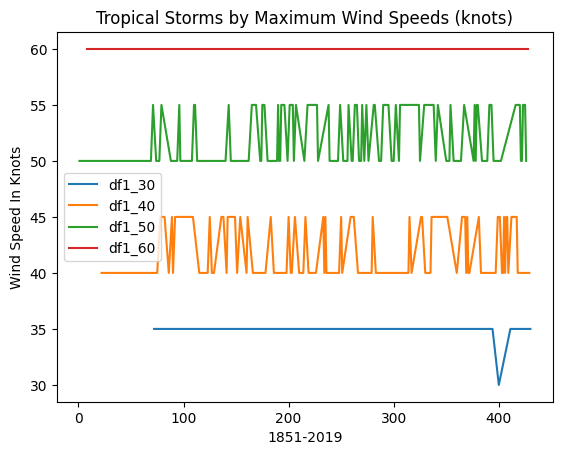

In [42]:
# Present tropcial storms by max wind speed
fig = plt.figure()      # create a new figure or activate an existing figure
ax = plt.subplot(111)   # control the size of figure

df1_30['MaxWinds'].plot(ax=ax, label = 'df1_30')
df1_40['MaxWinds'].plot(ax=ax, label = 'df1_40')
df1_50['MaxWinds'].plot(ax=ax, label = 'df1_50')
df1_60['MaxWinds'].plot(ax=ax, label = 'df1_60')
ax.set_ylabel('Wind Speed In Knots')
ax.set_xlabel('1851-2019')
ax.legend()
plt.title('Tropical Storms by Maximum Wind Speeds (knots)')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


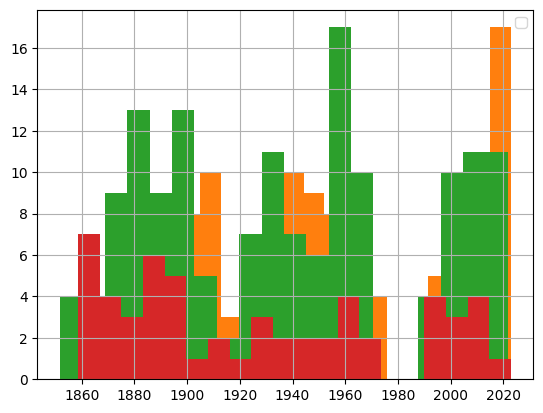

In [44]:
# Take more specific view for each knot
df1_30['Date'].hist(bins = 20)
df1_40['Date'].hist(bins = 20)
df1_50['Date'].hist(bins = 20)
df1_60['Date'].hist(bins = 20)